<a href="https://colab.research.google.com/github/hyojk2001/Python-Based-Data-Analysis/blob/main/0609_mlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.utils.testing import all_estimators

# 붓꽃 데이터 읽기
iris_data = pd.read_csv('iris.csv', encoding='utf-8')

# 붓꽃 데이터를 레이블 / 입력데이터로 분리
y = iris_data.loc[:, 'Name']
x = iris_data.loc[:,['SepalLength','SepalWidth','PetalLength','PetalWidth']]

# 학습/테스트 전용 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, train_size=0.8, shuffle=True)

# classifier 알고리즘 모두 추출
warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter='classifier')

for (name, algorithm) in allAlgorithms:
  # 각 알고리즘 객체 생성
  clf = algorithm()

  # 학습 및 평가
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(name, '의 정답률 : ', accuracy_score(y_test, y_pred))

AdaBoostClassifier 의 정답률 :  0.9666666666666667
BaggingClassifier 의 정답률 :  0.9666666666666667
BernoulliNB 의 정답률 :  0.23333333333333334
CalibratedClassifierCV 의 정답률 :  0.9
CategoricalNB 의 정답률 :  0.9666666666666667


ValueError: ignored

In [11]:
# K-분할 코로스 밸리데이션 : 학습 데이터가 적을 경우 평가의 신뢰성을 올리는 방법
# 데이터를 K개의 그룹으로 분할 후, K-1개를 학습 전용으로, 남은 1개를 평가 전용 데이터로 사용하는 걸 K번 반복

In [15]:
import pandas as pd
from sklearn.utils.testing import all_estimators
from sklearn.model_selection import KFold
import warnings
from sklearn.model_selection import cross_val_score

# 붓꽃 데이터 읽기
iris_data = pd.read_csv('iris.csv', encoding='utf-8')

# 붓꽃 데이터를 레이블 / 입력데이터로 분리
y = iris_data.loc[:, 'Name']
x = iris_data.loc[:,['SepalLength','SepalWidth','PetalLength','PetalWidth']]

# 학습/테스트 전용 데이터 분리
# x_train, x_test, y_train, y_test = train_test_split(x,y)

warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter='classifier')

# K-분할 크로스 밸리데이션 전용 객체
kfold_cv = KFold(n_splits=5, shuffle=True)

for (name, algorithm) in allAlgorithms:
  # 각 알고리즘 객체 생성
  clf = algorithm()

  # 학습 및 평가
  if hasattr(clf, 'score'):
    # 크로스 밸리데이션
    scores = cross_val_score(clf, x, y, cv=kfold_cv)
    print(name,'의 정답률 : ')
    print(scores)


AdaBoostClassifier 의 정답률 : 
[0.96666667 0.96666667 0.93333333 0.9        0.93333333]
BaggingClassifier 의 정답률 : 
[0.86666667 0.9        1.         0.96666667 1.        ]
BernoulliNB 의 정답률 : 
[0.3        0.26666667 0.2        0.3        0.16666667]
CalibratedClassifierCV 의 정답률 : 
[0.86666667 0.86666667 0.93333333 0.93333333 0.9       ]
CategoricalNB 의 정답률 : 
[0.93333333 0.96666667 0.9        0.86666667 0.96666667]
CheckingClassifier 의 정답률 : 
[nan nan nan nan nan]


TypeError: ignored

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.utils.testing import all_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# 붓꽃 데이터 읽기
iris_data = pd.read_csv('iris.csv', encoding='utf-8')

# 붓꽃 데이터를 레이블 / 입력데이터로 분리
y = iris_data.loc[:, 'Name']
x = iris_data.loc[:,['SepalLength','SepalWidth','PetalLength','PetalWidth']]

# 학습/테스트 전용 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, train_size=0.8, shuffle=True)

# 그리드 서치(탐욕 검색)
parameters = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'kernel':['rbf'], 'gamma':[0.001,0.0001]},
              {'C':[1,10,100,1000], 'kernel':['sigmoid'], 'gamma':[0.001,0.0001]}
]

kfold_cv = KFold(n_splits=5, shuffle=True)
clf = GridSearchCV(SVC(), parameters, cv=kfold_cv)
clf.fit(x_train, y_train)
print('최적의 매개 변수 ; ', clf.best_estimator_)

y_pred = clf.predict(x_test)
print('최종 정답률 : ', accuracy_score(y_test, y_pred))

최적의 매개 변수 ;  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
최종 정답률 :  0.9333333333333333


In [21]:
# numpy 사용법

import numpy as np

a = np.array([1,2,3,4,5])
print(a)
print(type(a))

[1 2 3 4 5]
<class 'numpy.ndarray'>


In [23]:
b = np.array([[1,2,3],[4,5,6]])
print(b)

[[1 2 3]
 [4 5 6]]


In [27]:
print(np.zeros(10))
print(np.ones(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
print(np.zeros((3,2)))

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [30]:
print(np.arange(5))     # 0 이상 5 미만
print(np.arange(2,9))   # 2 이상 9 미만
print(np.arange(5,8,0.5)) # 5 이상 8 미만을 0.5씩 증가시킴

[0 1 2 3 4]
[2 3 4 5 6 7 8]
[5.  5.5 6.  6.5 7.  7.5]


In [31]:
a = np.array([1,2,3,4,5])
b = a*2
print(b)

[ 2  4  6  8 10]


In [32]:
x = np.arange(10)
y = 3*x + 5
print(y)

[ 5  8 11 14 17 20 23 26 29 32]


In [35]:
a = np.array([[1,2,3],[4,5,6]])
print(a.shape)

(2, 3)


In [40]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a.shape)

(3, 3)


In [41]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
print()
b = a.reshape(3,2)
print(b)

[[1 2 3]
 [4 5 6]]

[[1 2]
 [3 4]
 [5 6]]


In [44]:
v = np.array([[1,2,3],[4,5,6],[7,8,9]])
a = v[0]
b = v[1:]
c = v[:, 0]
print(a)
print(b)
print(c)

[1 2 3]
[[4 5 6]
 [7 8 9]]
[1 4 7]


In [49]:
# OpenCV, TensorFlow, Keras 설치 설치하기

# !pip install opencv-python
# !pip install --upgrade tensorflow==2.5.0
# !pip install --upgrade keras==2.1.4

Requirement already up-to-date: tensorflow==2.5.0 in /usr/local/lib/python3.7/dist-packages (2.5.0)
Requirement already up-to-date: keras==2.1.4 in /usr/local/lib/python3.7/dist-packages (2.1.4)


In [51]:
import cv2
import urllib.request as req

# 이미지 다운로드
url = 'http://uta.pw/shodou/img/28/214.png'
req.urlretrieve(url, 'test.png')

# OpenCV 로 읽어들이기
img = cv2.imread('test.png')
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [53]:
# 이미지를 인라인 출력하기

%matplotlib inline

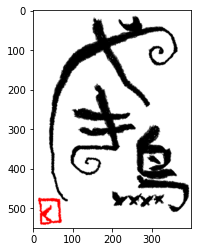

In [58]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('test.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

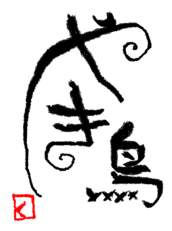

In [59]:
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

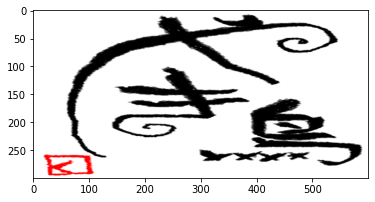

In [62]:
im2 = cv2.resize(img, (600,300))
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

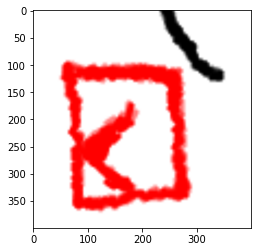

In [83]:
# 이미지 자르기 -> 배열 [y1:y2, x1:x2] 형식으로 이미지를 자를 수 있다

import matplotlib.pyplot as plt
import cv2

img = cv2.imread('test.png')
im2 = img[450:, 0:100]

# 이미지 크기 변경하기
im2 = cv2.resize(im2, (400,400))

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

얼굴의 좌표 :  158 18 166 166


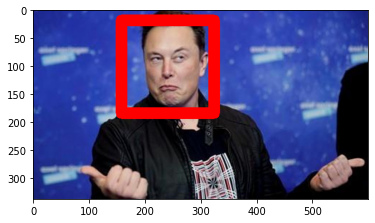

In [90]:
import matplotlib.pyplot as plt
import cv2

# cascade 파일 지정해서 검출기 생성
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어서 그레이스케일(흑백)으로 변환
# img = cv2.imread('girl.jpg')
img = cv2.imread('musk.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

# 결과 확인
if len(face_list) == 0:
  print('실패')
  quit()

# 인식한 부분 표시
for (x,y,w,h) in face_list:
  print('얼굴의 좌표 : ', x,y,w,h)
  red = (0,0,255)
  cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)

# 이미지 출력
# cv2.imwrite('face-detect.png', img)
cv2.imwrite('musk-face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

얼굴의 좌표 :  1007 176 187 187
얼굴의 좌표 :  1915 342 195 195
얼굴의 좌표 :  332 366 184 184
얼굴의 좌표 :  1584 379 181 181


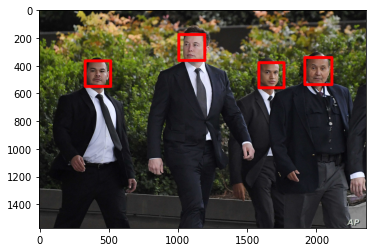

In [91]:
import matplotlib.pyplot as plt
import cv2

# cascade 파일 지정해서 검출기 생성
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어서 그레이스케일(흑백)으로 변환
img = cv2.imread('musk2.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

# 결과 확인
if len(face_list) == 0:
  print('실패')
  quit()

# 인식한 부분 표시
for (x,y,w,h) in face_list:
  print('얼굴의 좌표 : ', x,y,w,h)
  red = (0,0,255)
  cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)

# 이미지 출력
cv2.imwrite('musk2-face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()